<a href="https://colab.research.google.com/github/Priyabrata139/whether-the-patients-have-lung-cancer/blob/main/Final_project_ipynb_222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.figure_factory as ff
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [7]:
dataset = pd.read_csv('/survey lung cancer data set.csv')

# New Section

In [113]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [8]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [9]:
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [10]:
dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [11]:
dataset.shape

(309, 16)

In [12]:
dataset.corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
CHRONIC DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640
ALCOHOL CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226


In [13]:
hist_data =[dataset["AGE"].values]
group_labels = ['AGE']
ax=ff.create_distplot(hist_data, group_labels)
ax.show()

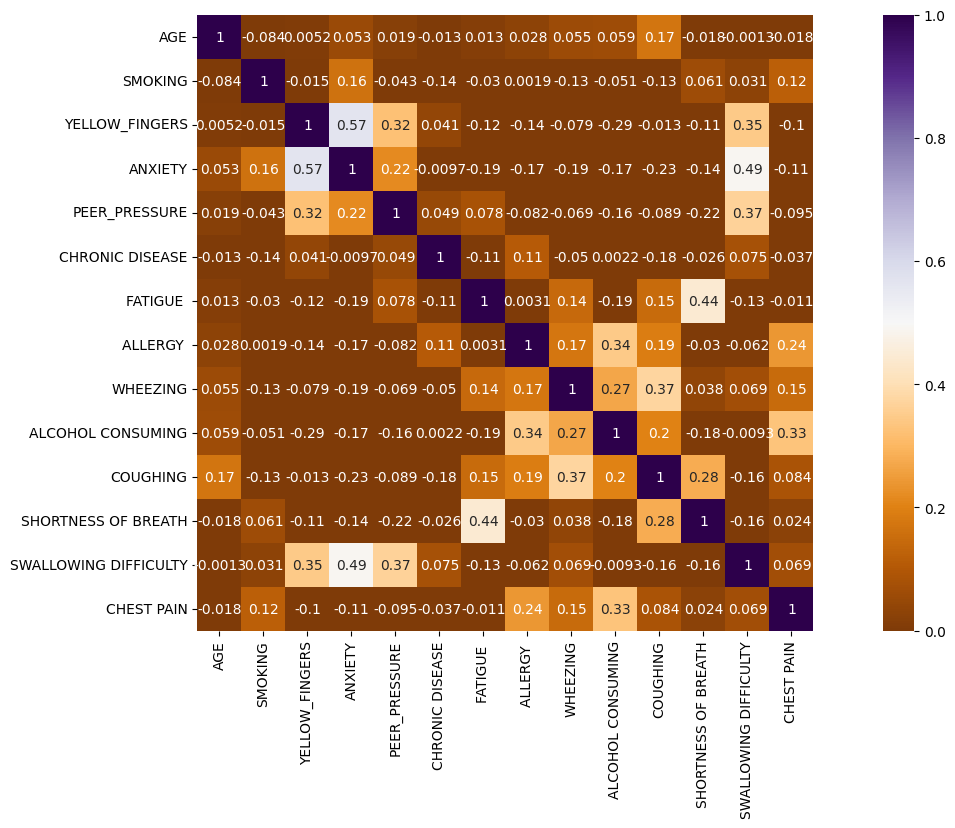

In [14]:
corrmat = dataset.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corrmat,annot=True, square=True, vmin=0, vmax=1,cmap="PuOr");

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

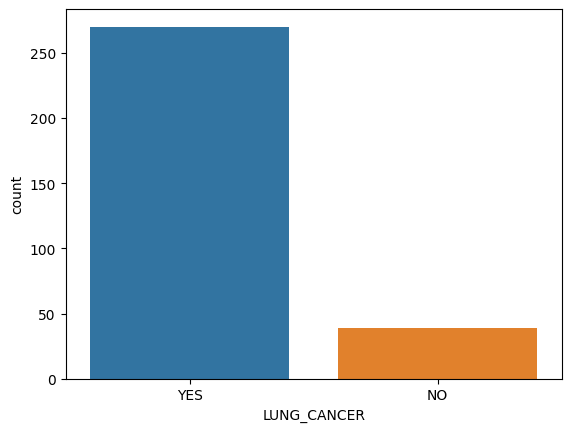

In [15]:
sns.countplot(x = 'LUNG_CANCER',data = dataset)

<Axes: xlabel='YELLOW_FINGERS', ylabel='count'>

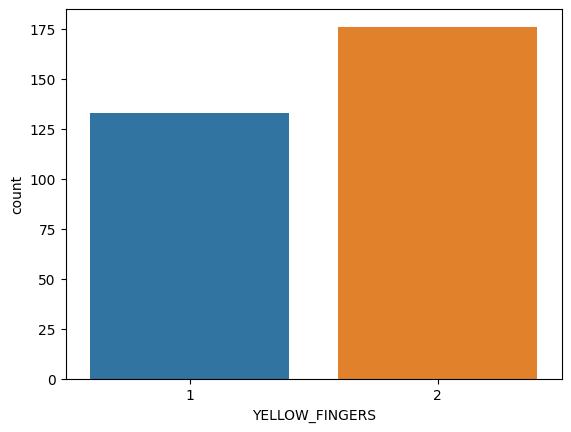

In [16]:
sns.countplot(x = 'YELLOW_FINGERS',data = dataset)

In [17]:
dataset['YELLOW_FINGERS'].unique()

array([2, 1])

In [18]:
values = dataset['LUNG_CANCER'].value_counts().tolist()
names = list(dict(dataset['LUNG_CANCER'].value_counts()).keys())

px.pie(dataset, values=values, names=names, hole = 0.5,
       color_discrete_sequence=["purple", "green"])

In [19]:
le = preprocessing.LabelEncoder()
dataset['GENDER'] = le.fit_transform(dataset['GENDER'])
dataset['LUNG_CANCER'] = le.fit_transform(dataset['LUNG_CANCER'])

GENDER Male=1,Female=0 / LUNG CANCER YES=1,NO=0.

In [20]:
dataset['GENDER']

0      1
1      1
2      0
3      1
4      0
      ..
304    0
305    1
306    1
307    1
308    1
Name: GENDER, Length: 309, dtype: int64

In [21]:
dataset['LUNG_CANCER']

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [22]:
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [23]:
print(dataset.corr()["LUNG_CANCER"].abs().sort_values(ascending=False))

LUNG_CANCER              1.000000
ALLERGY                  0.327766
ALCOHOL CONSUMING        0.288533
SWALLOWING DIFFICULTY    0.259730
WHEEZING                 0.249300
COUGHING                 0.248570
CHEST PAIN               0.190451
PEER_PRESSURE            0.186388
YELLOW_FINGERS           0.181339
FATIGUE                  0.150673
ANXIETY                  0.144947
CHRONIC DISEASE          0.110891
AGE                      0.089465
GENDER                   0.067254
SHORTNESS OF BREATH      0.060738
SMOKING                  0.058179
Name: LUNG_CANCER, dtype: float64


In [24]:
# X = dataset.drop(['AGE','GENDER','SHORTNESS OF BREATH','SMOKING','LUNG_CANCER'],axis=1)
X = dataset.drop(['AGE','GENDER','SHORTNESS OF BREATH','LUNG_CANCER'],axis=1)
X

,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,2,2,1,1,2,1,2,2,2,2,2
1,2,1,1,1,2,2,2,1,1,1,2,2
2,1,1,1,2,1,2,1,2,1,2,1,2
3,2,2,2,1,1,1,1,1,2,1,2,2
4,1,2,1,1,1,1,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,1,1,2,2,2,1,1,2,2,2,1
305,2,1,1,1,1,2,2,2,2,2,1,2
306,2,1,1,1,1,1,2,2,2,2,1,2
307,2,1,2,1,1,2,2,1,2,2,1,2


In [25]:
y = dataset['LUNG_CANCER']
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 10, metric = 'hamming')
KNN.fit(X, y)
predictions = KNN.predict(X_test)
val1 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for KNN: ", val1, "\n")
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for KNN: ")
print(classification_report(y_test, predictions))

*Accuracy score for KNN:  91.93548387096774 

*Confusion Matrix for KNN: 
[[ 7  3]
 [ 2 50]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.94      0.96      0.95        52

    accuracy                           0.92        62
   macro avg       0.86      0.83      0.84        62
weighted avg       0.92      0.92      0.92        62



In [28]:
y_pred_knn = KNN.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)
cm
knn_result = accuracy_score(y_test,y_pred_knn)
print("Accuracy :",knn_result)
recall_knn = cm[0][0]/(cm[0][0] + cm[0][1])
precision_knn = cm[0][0]/(cm[0][0]+cm[1][1])
recall_knn,precision_knn

Accuracy : 0.9193548387096774


(0.7, 0.12280701754385964)

In [46]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear')
SVM.fit(X, y)
predictions = SVM.predict(X_test)
val2 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM: ", val2, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_test, predictions))

*Accuracy score for SVM:  95.16129032258065 

*Confusion Matrix for SVM: 
[[ 8  2]
 [ 1 51]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.96      0.98      0.97        52

    accuracy                           0.95        62
   macro avg       0.93      0.89      0.91        62
weighted avg       0.95      0.95      0.95        62



In [30]:
y_pred_svm = SVM.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
cm
svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)
recall_svm = cm[0][0]/(cm[0][0] + cm[0][1])
precision_svm = cm[0][0]/(cm[0][0]+cm[1][1])
recall_svm,precision_svm


Accuracy : 0.9516129032258065


(0.8, 0.13559322033898305)

In [31]:
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='lbfgs', alpha=1e-5,  hidden_layer_sizes=(50), random_state=1)
ANN.fit(X, y)
predictions = ANN.predict(X_test)
val3 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for ANN: ", val3, "\n")
print("*Confusion Matrix for ANN: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for ANN: ")
print(classification_report(y_test, predictions))

*Accuracy score for ANN:  96.7741935483871 

*Confusion Matrix for ANN: 
[[ 9  1]
 [ 1 51]]
*Classification Report for ANN: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.98      0.98      0.98        52

    accuracy                           0.97        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.97      0.97      0.97        62



In [103]:
y_pred_ann = ANN.predict(X_test)
cm = confusion_matrix(y_test, y_pred_ann)
cm
ann_result = accuracy_score(y_test,y_pred_ann)
print("Accuracy :",ann_result)
recall_ann = cm[0][0]/(cm[0][0] + cm[0][1])
precision_ann = cm[0][0]/(cm[0][0]+cm[1][1])
recall_ann,precision_ann

Accuracy : 0.967741935483871


(0.9, 0.15)

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)

# Fit the GBM model on your training data
gbm.fit(X, y)

# Make predictions on the test data
predictions_gbm = gbm.predict(X_test)

# Calculate accuracy
accuracy_gbm = accuracy_score(y_test, predictions_gbm) * 100
val4 = accuracy_gbm
print("Accuracy score for GBM: ", accuracy_gbm)

# Print Confusion Matrix
print("Confusion Matrix for GBM:")
print(confusion_matrix(y_test, predictions_gbm))

# Print Classification Report
print("Classification Report for GBM:")
print(classification_report(y_test, predictions_gbm))


Accuracy score for GBM:  96.7741935483871
Confusion Matrix for GBM:
[[ 9  1]
 [ 1 51]]
Classification Report for GBM:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.98      0.98      0.98        52

    accuracy                           0.97        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.97      0.97      0.97        62



In [90]:
y_pred_gbm = gbm.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gbm)
cm
gbm_result = accuracy_score(y_test,y_pred_gbm)
print("Accuracy :",gbm_result)
recall_gbm = cm[0][0]/(cm[0][0] + cm[0][1])
precision_gbm = cm[0][0]/(cm[0][0]+cm[1][1])
recall_gbm,precision_gbm

Accuracy : 0.967741935483871


(0.9, 0.15)

In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the Naive Bayes model on your training data
nb_classifier.fit(X, y)

# Make predictions on the test data
predictions_nb = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, predictions_nb) * 100
print("Accuracy score for Naive Bayes: ", accuracy_nb)
val5 = accuracy_nb

# Print Confusion Matrix
print("Confusion Matrix for Naive Bayes:")
print(confusion_matrix(y_test, predictions_nb))

# Print Classification Report
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, predictions_nb))


Accuracy score for Naive Bayes:  87.09677419354838
Confusion Matrix for Naive Bayes:
[[ 5  5]
 [ 3 49]]
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.91      0.94      0.92        52

    accuracy                           0.87        62
   macro avg       0.77      0.72      0.74        62
weighted avg       0.86      0.87      0.87        62



In [91]:
y_pred_nb = nb_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_nb)
cm
nb_result = accuracy_score(y_test,y_pred_nb)
print("Accuracy :",nb_result)
recall_nb = cm[0][0]/(cm[0][0] + cm[0][1])
precision_nb = cm[0][0]/(cm[0][0]+cm[1][1])
recall_nb,precision_nb

Accuracy : 0.8709677419354839


(0.5, 0.09259259259259259)

In [79]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)

# Create an ensemble of classifiers using a VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('Random Forest', rf_classifier),
    ('Gradient Boosting', gbm_classifier)
], voting='soft')

# Fit the ensemble model on your training data
ensemble_classifier.fit(X, y)

# Make predictions on the test data
predictions_ensemble = ensemble_classifier.predict(X_test)

# Calculate accuracy
accuracy_ensemble = accuracy_score(y_test, predictions_ensemble) * 100
print("Accuracy score for Ensemble Model: ", accuracy_ensemble)
val6 = accuracy_ensemble

# Print Confusion Matrix
print("Confusion Matrix for Ensemble Model:")
print(confusion_matrix(y_test, predictions_ensemble))

# Print Classification Report
print("Classification Report for Ensemble Model:")
print(classification_report(y_test, predictions_ensemble))


Accuracy score for Ensemble Model:  96.7741935483871
Confusion Matrix for Ensemble Model:
[[ 9  1]
 [ 1 51]]
Classification Report for Ensemble Model:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.98      0.98      0.98        52

    accuracy                           0.97        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.97      0.97      0.97        62



In [92]:
y_pred_em = ensemble_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_em)
cm
em_result = accuracy_score(y_test,y_pred_em)
print("Accuracy :",em_result)
recall_em = cm[0][0]/(cm[0][0] + cm[0][1])
precision_em = cm[0][0]/(cm[0][0]+cm[1][1])
recall_em,precision_em

Accuracy : 0.967741935483871


(0.9, 0.15)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Logistic Regression model
logistic_regression = LogisticRegression(random_state=1, max_iter=1000)

# Fit the model on your training data
logistic_regression.fit(X, y)

# Make predictions on the test data
predictions_lr = logistic_regression.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, predictions_lr) * 100
print("Accuracy score for Logistic Regression: ", accuracy_lr)
val7 = accuracy_lr

# Print Confusion Matrix
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, predictions_lr))

# Print Classification Report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, predictions_lr))


Accuracy score for Logistic Regression:  91.93548387096774
Confusion Matrix for Logistic Regression:
[[ 6  4]
 [ 1 51]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.93      0.98      0.95        52

    accuracy                           0.92        62
   macro avg       0.89      0.79      0.83        62
weighted avg       0.92      0.92      0.91        62



In [93]:
y_pred_lr = logistic_regression.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)
cm
lr_result = accuracy_score(y_test,y_pred_lr)
print("Accuracy :",lr_result)
recall_lr = cm[0][0]/(cm[0][0] + cm[0][1])
precision_lr = cm[0][0]/(cm[0][0]+cm[1][1])
recall_lr,precision_lr

Accuracy : 0.9193548387096774


(0.6, 0.10526315789473684)

In [81]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Sequential model
dnn = Sequential()

# Add input layer and hidden layers
dnn.add(Dense(units=64, input_dim=X.shape[1], activation='relu'))
dnn.add(Dense(units=32, activation='relu'))
dnn.add(Dense(units=16, activation='relu'))

# Add the output layer
dnn.add(Dense(units=1, activation='sigmoid'))

# Compile the model
dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
dnn.fit(X, y, epochs=10, batch_size=32)

# Make predictions on the test data
predictions_dnn = (dnn.predict(X_test) > 0.5).astype(int)

# Calculate accuracy
accuracy_dnn = accuracy_score(y_test, predictions_dnn) * 100
print("Accuracy score for DNN: ", accuracy_dnn)
val8 = accuracy_dnn

# Print Confusion Matrix
print("Confusion Matrix for DNN:")
print(confusion_matrix(y_test, predictions_dnn))

# Print Classification Report
print("Classification Report for DNN:")
print(classification_report(y_test, predictions_dnn))


Epoch 1/10
10/10 [==============================] - 1s 2ms/step - loss: 0.7361 - accuracy: 0.4110
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.8738
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8738
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8738
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8738
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8738
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3341 - accuracy: 0.8738
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8738
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.8738
Epoch 10/10
2/2 [==============================] - 0s 6ms/step
Accuracy score for DNN:  83.87096774193549
Confusion Ma

In [101]:
y_pred_dnn = (dnn.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_dnn)
cm
dnn_result = accuracy_score(y_test,y_pred_dnn)
print("Accuracy :",dnn_result)
recall_dnn = cm[0][0]/(cm[0][0] + cm[0][1])
precision_dnn = cm[0][0]/(cm[0][0]+cm[1][1])
recall_dnn,precision_dnn

2/2 [==============================] - 0s 6ms/step
Accuracy : 0.8387096774193549


(0.0, 0.0)

In [118]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
RF = RandomForestClassifier(n_estimators=100, random_state=1)  # You can adjust the number of trees (n_estimators)

# Fit the Random Forest to your training data
RF.fit(X, y)

# Make predictions on the test data
predictions_rf = RF.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, predictions_rf) * 100
print("*Accuracy score for Random Forest: ", accuracy_rf, "\n")
val9 = accuracy_rf

# Print confusion matrix
print("*Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, predictions_rf))

# Print classification report
print("*Classification Report for Random Forest:")
print(classification_report(y_test, predictions_rf))


*Accuracy score for Random Forest:  98.38709677419355 

*Confusion Matrix for Random Forest:
[[10  0]
 [ 1 51]]
*Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.98      0.99        52

    accuracy                           0.98        62
   macro avg       0.95      0.99      0.97        62
weighted avg       0.99      0.98      0.98        62



In [116]:
y_pred_rf = RF.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
cm
rf_result = accuracy_score(y_test,y_pred_rf)
print("Accuracy :",rf_result)
recall_rf = cm[0][0]/(cm[0][0] + cm[0][1])
precision_rf = cm[0][0]/(cm[0][0]+cm[1][1])
recall_rf,precision_rf

Accuracy : 0.9838709677419355


(1.0, 0.16393442622950818)

In [119]:
score = [val1,val2,val3, val4, val5, val6, val7, val8, val9]
classifier = ('KNN','SVM','ANN', 'GBM','GNB','EM', 'LR', 'DNN', 'RF')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6 7 8]
[91.93548387096774, 95.16129032258065, 96.7741935483871, 96.7741935483871, 87.09677419354838, 96.7741935483871, 91.93548387096774, 83.87096774193549, 98.38709677419355]


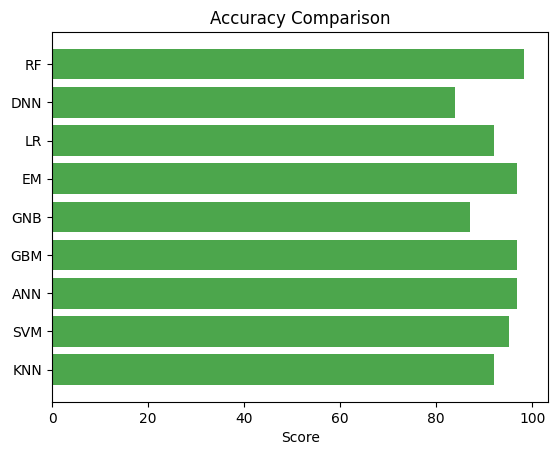

In [120]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.7,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Accuracy Comparison')
plt2.show()

In [121]:
results ={'Accuracy': [knn_result*100,svm_result*100,ann_result*100,gbm_result*100,nb_result*100,lr_result*100,dnn_result*100,em_result*100,rf_result*100],
 'Recall':[recall_knn*100,recall_svm*100,recall_ann*100,recall_gbm*100,recall_nb*100,recall_lr*100,recall_em*100,recall_dnn*100,recall_rf*100],
 'Precision': [precision_knn*100,precision_svm*100,precision_ann*100,precision_gbm*100,precision_nb*100,precision_lr*100,precision_em*100,precision_dnn*100,precision_rf*100]}
index = ['KNN','SVM','ANN', 'GBM','GNB','EM', 'LR', 'DNN', 'RF']

In [122]:
results =pd.DataFrame(results,index=index)

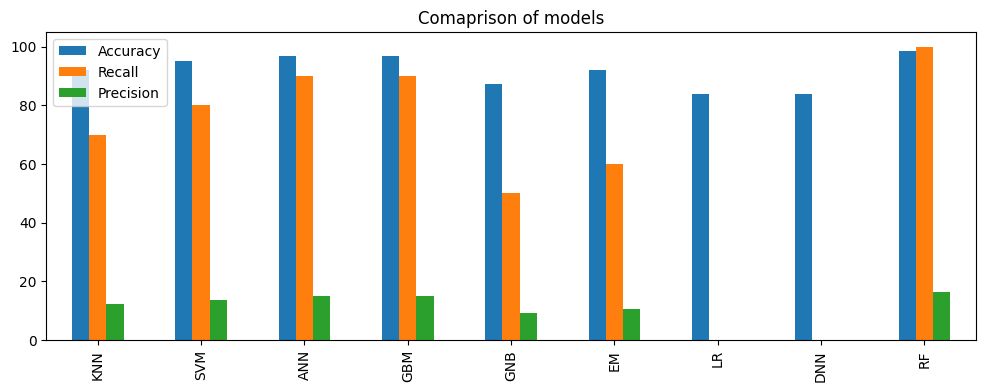

In [123]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(12,4)).get_figure()
fig.savefig('acc.jpeg')